## Rumore rosa

In [5]:
%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [6]:
plt.rcParams["figure.figsize"] = (14,4)

Il rumore rosa ha una **densità** spettrale di potenza inversamente proporzionale alla frequenza. Densità spettrale vuol dire che l'unità di misura e' Watt/Hertz (W/Hz).

Poniamo che la funzione che rappresenta la densità spettrale di potenza sia:

$$
    p(f) = \frac{1}{f} \mbox{  W/Hz}
$$

Se plottiamo la frequenza in scala lineare avremo un'iperbole:

In [72]:
MAX_FREQ = 1000
STEP = 0.01

f = np.arange(1, MAX, STEP)
p = 1.0 / f

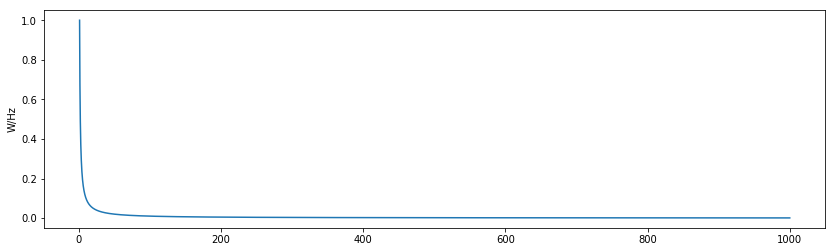

In [73]:
plt.plot(f, p);
plt.ylabel("W/Hz");

Se ora plottiamo la stessa curva in scala semilogaritmica abbiamo ancora una curva discendente (com'è giusto che sia):

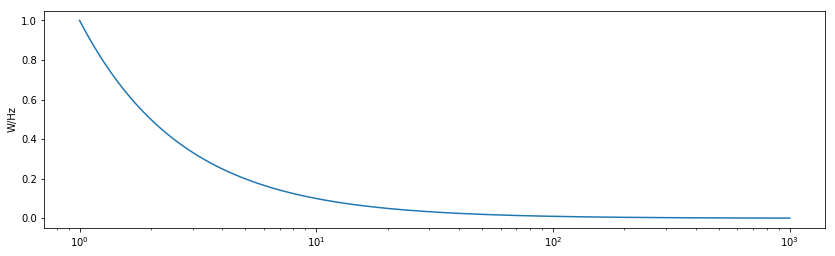

In [74]:
plt.semilogx(f, p);
plt.ylabel("W/Hz");

Se adesso guardiamo la **potenza** erogata su una specifica banda di frequenze, dobbiamo integrare la densità di potenza sulla banda in questione:

$$
    P(f_0, f_1) = \int_{f_0}^{f_1} p(f)df = \log\frac{f_1}{f_0} \mbox{ Watts}
$$

Da notare che ora il risultato **è una misura di potenza (e quindi espressa in Watts)**. Se integriamo su bande di frequenza adiacenti per le quali il rapporto $f_1/f_0$ è costante (per esempio uguale a 2 in caso di bande di un'ottava ciascuna), la potenza erogata sarà costante su ogni banda:

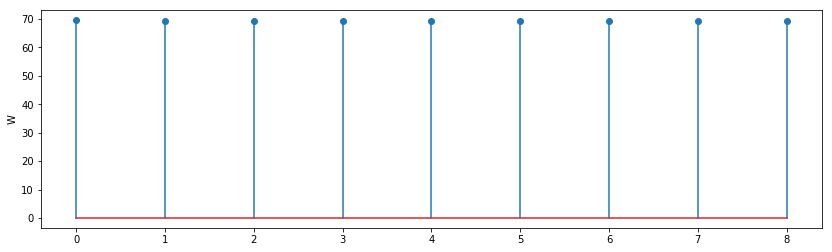

In [77]:
ratio = 2 # bande di un'ottava
#ratio = 3/2

f0 = 1
f1 = f0 * ratio
energy = np.array([])
freq = np.array([])
while f1 < MAX:
    # indici nell'array della densità spettrale
    ix = int((f0 - 1) / STEP)
    iy = int((f1 - 1) / STEP)
    energy = np.r_[energy, np.sum(p[ix:iy])]
    f0 = f1
    f1 = f0 * ratio

plt.stem(energy);
plt.ylabel("W");